In [34]:
# import libraries
import pandas as pd

# load the dataset
music_data = pd.read_csv('musicdata.csv')
print(music_data.head())

   Unnamed: 0                                   Track Name  \
0           0                                Bijlee Bijlee   
1           1                                  Expert Jatt   
2           2  Kaun Nachdi (From "Sonu Ke Titu Ki Sweety")   
3           3                                  Na Na Na Na   
4           4                                  Patiala Peg   

                      Artists                         Album Name  \
0               Harrdy Sandhu                      Bijlee Bijlee   
1                       Nawab                        Expert Jatt   
2  Guru Randhawa, Neeti Mohan   High Rated Gabru - Guru Randhawa   
3                      J Star                        Na Na Na Na   
4              Diljit Dosanjh  Do Gabru - Diljit Dosanjh & Akhil   

                 Album ID                Track ID  Popularity Release Date  \
0  3tG0IGB24sRhGFLs5F1Km8  1iZLpuGMr4tn1F5bZu32Kb          70   2021-10-30   
1  2gibg5SCTep0wsIMefGzkd  7rr6n1NFIcQXCsi43P0YNl          65 

In [35]:
# column info and summary statistics

music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [36]:
print(music_data.describe())

       Unnamed: 0  Popularity  Duration (ms)  Danceability     Energy  \
count  100.000000  100.000000     100.000000    100.000000  100.00000   
mean    49.500000   50.950000  210543.180000      0.767210    0.79763   
std     29.011492   16.496326   37961.050214      0.085302    0.11572   
min      0.000000    0.000000  141862.000000      0.501000    0.47700   
25%     24.750000   46.000000  186098.500000      0.714750    0.71125   
50%     49.500000   56.500000  205076.000000      0.772000    0.81700   
75%     74.250000   62.000000  226079.000000      0.826500    0.88125   
max     99.000000   72.000000  367818.000000      0.959000    0.98800   

             Key    Loudness       Mode  Speechiness  Acousticness  \
count  100.00000  100.000000  100.00000   100.000000    100.000000   
mean     4.54000   -4.399930    0.43000     0.115615      0.165559   
std      3.64434    1.612703    0.49757     0.075819      0.152536   
min      0.00000   -8.272000    0.00000     0.029400      0.00

In [37]:
# there is a  unknown column. lets see if it has null values or not
music_data.isnull().sum()

Unnamed: 0          0
Track Name          6
Artists             6
Album Name          6
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [38]:
# Now, lets perform data cleaning

# dropping the 'unnamed: 0' column
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])

# handling missing values by filinf them with placeholder text
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('unknown')

/home/deb/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


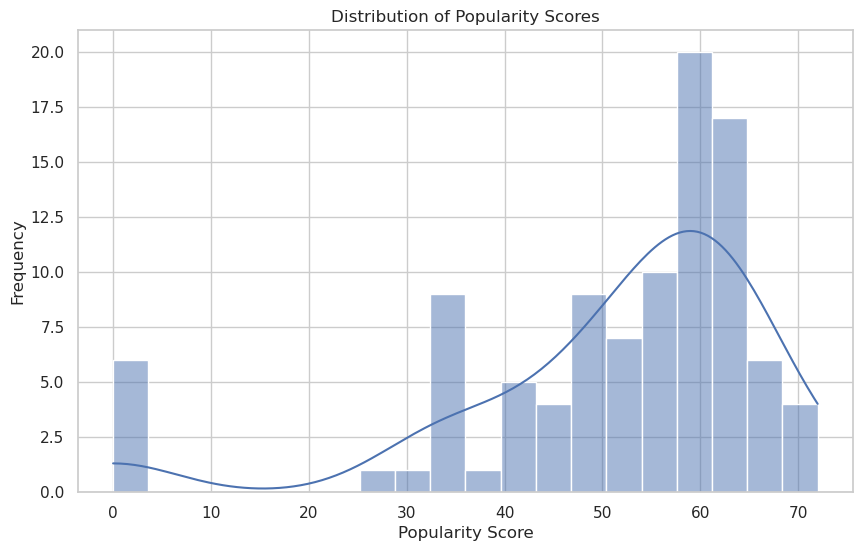

In [39]:
# lets examine the distribution of the poopularity score and then
# lets look at correlation between popularity and other musical features.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the distribution of popularity
plt.figure(figsize=(10,6))
sns.histplot(music_data_cleaned['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

In [40]:
# The distribution of popularity scores shows a range mainly between 40-70
# with peaks around 50s and 60s
# This indicates most tracks in dataset have moderate to high popularity

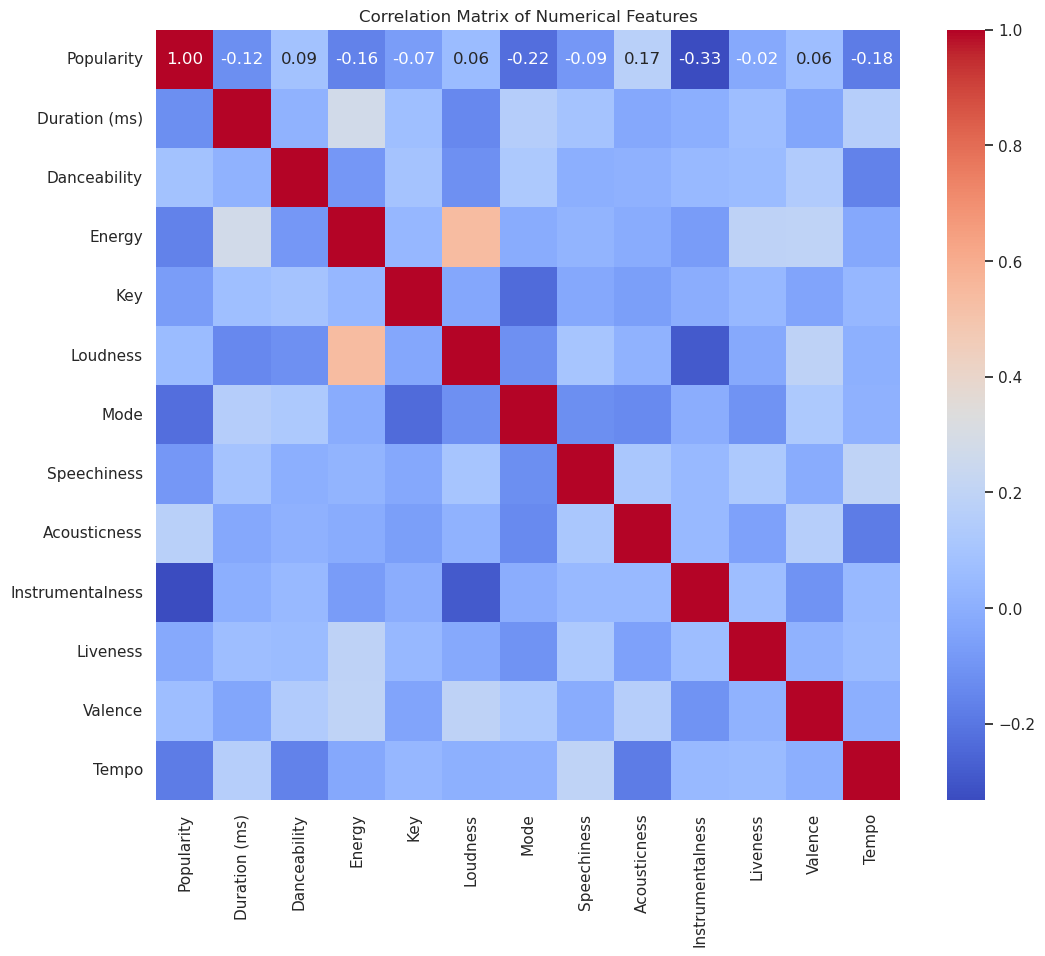

In [41]:
# let see the correlation matrix

plt.figure(figsize=(12,10))
correlation_matrix = music_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [42]:
# heatmap provides various feature.
# Popularity seems to have some level of positive correlation with loudness and energy, while it has slight neagative correlations with acousticness
# This suggests that louder and more energitic tracks tend to be more popular, while more acoustic tracks tend to be less popular
# Danceability and valence also show some positive correlation with popularity, indicating that tracks that are more danceabale and have a happier tone might be by listners

In [43]:
#Lets see the individual features impacts ont he popularity of music tracks.
# lets analyze:
# Danceability vs Popularity
# Energy vs Popularity
# Loudness vs Popularity
# Acousticness vs Popularity
# valence vs popularity

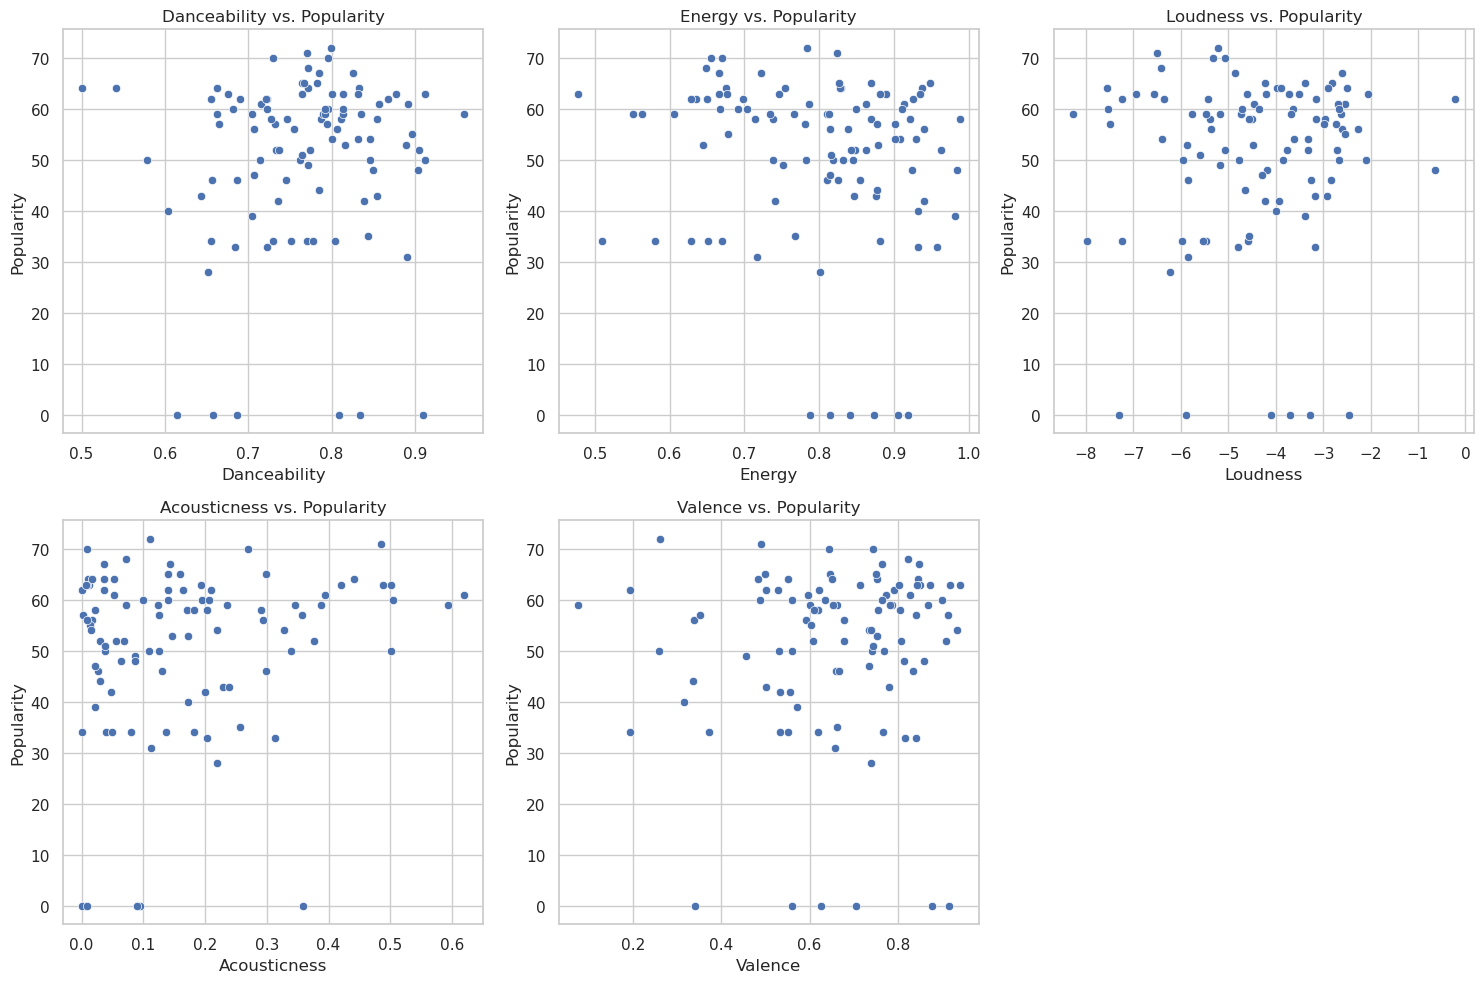

In [44]:
# for each of these features, we'll create plots to visualize their relationship with popularity

# creating scatter plots for various featres vs popularity
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15,10))

for i, feature in enumerate(features, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'])
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

In [45]:
# Danceability vs Popularity: Higher danceability scores tend to correlate with moderate to high priority
# This suggests that more danceable tracks are generally more popular

In [46]:
# Energy vs Popularity: Similar to danceability, higher energy levels in tracks often correlate with higher popularity.
# That aligns with the trend that energetic tracks are preferred by listners

In [47]:
# Loudness vs Popularity : There’s a trend showing that louder tracks tend to have higher popularity scores.
# This might reflect listener preference for more vibrant and powerful sound profiles.

In [48]:
# Acousticness vs. Popularity: Acousticness shows a somewhat inverse relationship with popularity, where tracks with lower acousticness tend to be more popular. 
# This could suggest that highly acoustic tracks are less favoured in the dataset’s music genre context.

In [49]:
# Valence vs. Popularity: Tracks with higher valence, which indicates a happier or more positive tone, show a slight tendency towards higher popularity. 
# This might imply that listeners prefer tracks that have a positive emotional tone.

In [50]:
# Now, let’s have a look at how danceability, energy, and other features impact popularity differently when the track is explicit versus when it’s not. This can reveal whether explicit content has a modifying effect on the relationship between audio features and popularity:

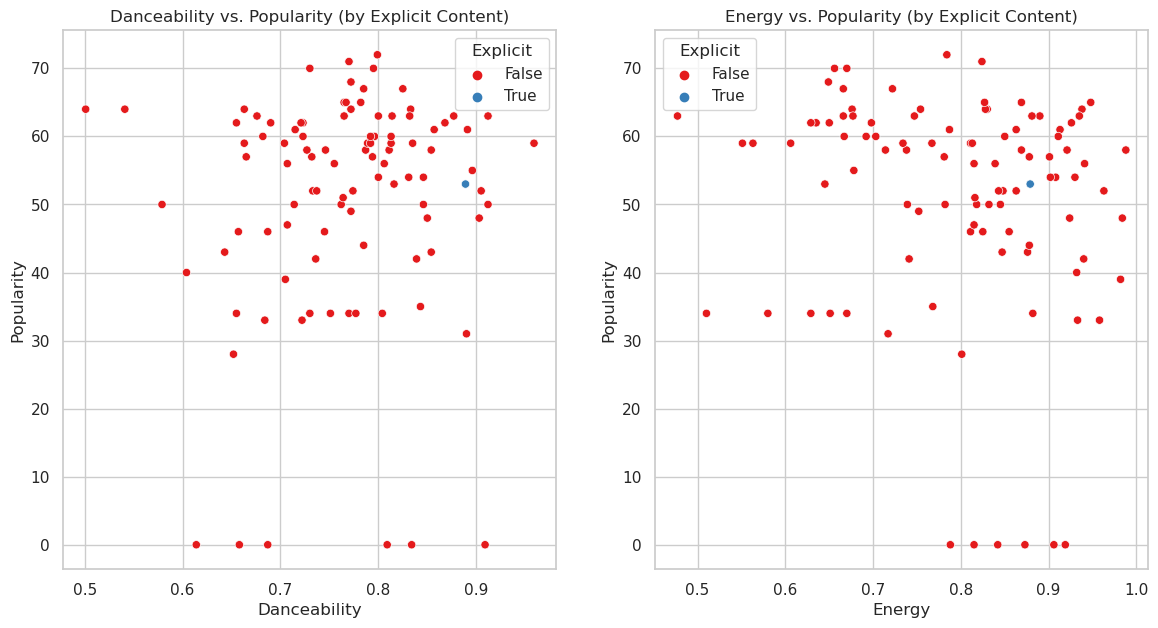

In [51]:
# creating plots for danceability vs. Popularity and energy vs. Popularity, segmented by explicit content
plt.figure(figsize=(14,7))

# danceability vs. popularity
plt.subplot(1,2,1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Danceability vs. Popularity (by Explicit Content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# energy vs. Popularity
plt.subplot(1,2,2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Energy vs. Popularity (by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

#plt.tight_alyout()
plt.show()

In [52]:
### The segmented scatter plots for Danceability vs. Popularity and Energy vs. Popularity, divided by whether tracks are explicit or not, show some interesting trends:

# Danceability vs. Popularity: Both explicit and non-explicit tracks show a positive trend between danceability and popularity. However, explicit tracks tend to cluster slightly higher on the popularity scale at similar levels of danceability compared to non-explicit tracks.
# Energy vs. Popularity: Similar to danceability, there’s a generally positive relationship between energy and popularity for both explicit and non-explicit tracks. Explicit tracks appear to achieve higher popularity at lower energy levels compared to non-explicit tracks, suggesting that the explicit content may appeal to certain listener groups more, irrespective of energy level.

In [53]:
# lets set the dataset for statistical modelling using linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# preparing the dataset for regression
# convert 'Explicit' from boolean to integer(0  or 1)
music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

# selecting features and target for the model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness','Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# initializin gand training the linear regreession model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicitng on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
coefficients

Danceability        1.249640e+00
Energy             -3.204815e+00
Loudness            1.141456e+00
Acousticness        2.469403e+00
Valence             2.125671e+00
Explicit            1.620926e-14
Key                -3.189486e+00
Mode               -5.859715e+00
Speechiness         3.398224e-02
Instrumentalness    3.390750e-01
Tempo              -1.865736e+00
dtype: float64

In [54]:
# The output above represents coefficients from the regrssion model quantifying the impact of various musical features on track popularity
# A positive coefficient indicates that an increase in the features is associated with an increase in popularity, and viec cersa froa negative coefficient.